In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import scipy.signal as signal
import scipy.stats as stats
from scipy.interpolate import spline
from statsmodels.robust.scale import mad
import scipy.io as sio
import hsutil
from importlib import reload
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-paper')

In [2]:
path = 'F:\\heatseeking-pilot\\'
roman = ['20161007_orl0927-0',
        '20161023_orl1011-2',
        '20161028_orl1018-1',
        '20161104_orl1025-1',
        '20161107_orl1025-1',
        '20161107_orl1025-2',
        '20161111_orl1101-2',
        '20161113_orl1101-1']
dot = ['20161013_orl1004-0',
      '20161023_orl1011-1',
      '20161028_orl1018-0',
      '20161104_orl1025-0',
      '20161106_orl1025-0',
      '20161107_orl1025-0',
      '20161111_orl1101-1',
      '20161113_orl1101-2']
air = ['20161013_orl1004-1',
      '20161020_orl1011-0',
      '20161021_orl1011-0',
      '20161021_orl1011-1',
      '20161023_orl1011-0',
      '20161110_orl1101-0']
blank = ['20161021_orl1011-2']
bf48 = ['20180419_1',
       '20180419_2',
       '20180420_1']

def getmat(path,fn):
    dat = sio.loadmat(path+fn+'\\'+fn+'_topy.mat')
    Rtot = dat['Rtot'][0]
    return Rtot

def itergetmat(path,flist,length=9180):
    n = len(flist)
    Rtot = np.empty([n,length])
    for i in range(n):
        Rtot[i] = getmat(path,flist[i])
    return Rtot

def getmatdot(path,fn):
    dat = sio.loadmat(path+fn+'\\'+fn+'_topydot.mat')
    Rdot = dat['Rdot'][0]
    return Rdot

def itergetmatdot(path,flist,length=9180):
    n = len(flist)
    Rdot = np.empty([n,length])
    for i in range(n):
        Rdot[i] = getmatdot(path,flist[i])
    return Rdot

def plot_trace(t,tot,c='0.5',ax=None,label=None,indiv=False,mad=True):
    if ax is None:
        ax = plt.gca()
    avg = np.nanmedian(tot,axis=0)
    if indiv:
        for trace in tot:
            ax.plot(t,trace,c=c,alpha=0.1)
    if sem:
        medabs = mad(tot,c=1,axis=0)
        ax.fill_between(t,avg-medabs,avg+medabs,alpha=0.4,facecolor=c,edgecolor=None)
    ax.plot(t,avg,alpha=1,c=c,label=label)
    return ax

In [3]:
cRtot = itergetmat(path,roman)
dRtot = itergetmat(path,dot)
aRtot = itergetmat(path,air)
bRtot = itergetmat(path,blank)
#bfRtot = itergetmat(path,bf48)
#cRdot = itergetmatdot(path,roman)
#dRdot = itergetmatdot(path,dot)
#aRdot = itergetmatdot(path,air)
#bRdot = itergetmatdot(path,blank)
Rtemp = sio.loadmat(path+'Rtemp.mat')['Rtemp']
Rtavg = np.mean(Rtemp,axis=0)

In [31]:
np.mean(np.nanmedian(np.diff(cRtot[:,540:720],axis=1),axis=0))

0.0025106818733852988

In [26]:
np.shape(np.diff(cRtot[:,540:720],axis=1))

(8, 179)

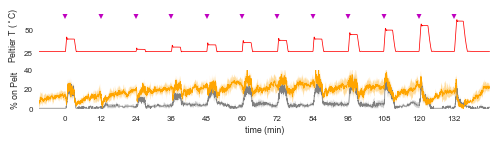

In [5]:
reload(hsutil)

t = np.array(range(-540,8640)) / 60.

f,ax = plt.subplots(2,sharex=True)
f.set_size_inches(7,2)

ax[0] = hsutil.plot_trace(t,Rtemp,c='r',ax=ax[0],indiv=False,med=True)
ax[0].set_xlim(min(t),max(t))
ax[0].set_xticks(range(0,144,12))
ax[0].set_ylabel('Peltier T ($^\circ$C)')

ax[1] = hsutil.plot_trace(t,cRtot*100,c='0.5',ax=ax[1],indiv=False,med=True)
ax[1].set_xlabel('time (min)')
#ax[2].text(136,0.38,'n=8',color='0.5')

ax[1] = hsutil.plot_trace(t,dRtot*100,c='orange',ax=ax[1],indiv=False,med=True)
ax[1].set_ylim(-1,40)
ax[1].set_yticks(np.arange(0,45,20))
ax[1].set_ylabel('% on Pelt')
#ax[1].text(136,0.38,'n=8',color='orange')

ax[0].plot(range(0,144,12),[65]*12,'mv')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(False)
    a.yaxis.grid(False)

plt.tight_layout()
plt.savefig('heat_groups.pdf')

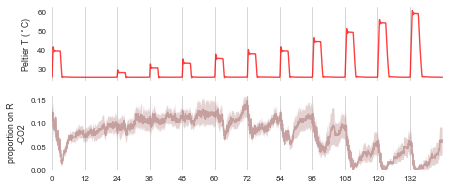

In [39]:
t = np.array(range(8640)) / 60.

f,ax = plt.subplots(2,sharex=True)
f.set_size_inches(7,3)

ax[0] = plot_trace(t,Rtemp[:,540:],c='r',ax=ax[0],indiv=False,sem=True)
ax[0].set_xlim(min(t),max(t))
ax[0].set_xticks(range(0,144,12))
ax[0].set_ylabel('Peltier T ($^\circ$C)')

ax[1] = plot_trace(t,aRtot[:,540:],c='rosybrown',ax=ax[1],indiv=False,sem=True)
ax[1].set_ylim(0,0.16)
ax[1].set_yticks(np.arange(0,0.16,0.05))
ax[1].set_ylabel('proportion on R\n-CO2')
#ax[1].text(136,0.20,'n=6',color='rosybrown')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(True)
    a.yaxis.grid(False)

plt.savefig('heat_groups_co2.pdf')

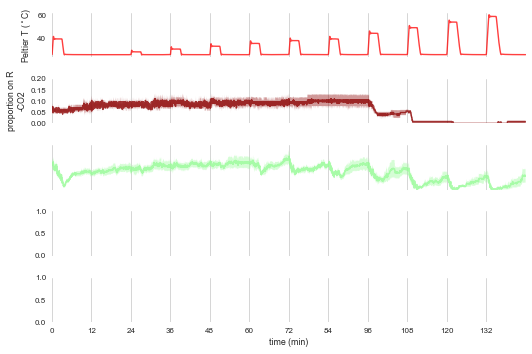

In [46]:
t = np.array(range(8640)) / 60.

f,ax = plt.subplots(5,sharex=True)
f.set_size_inches(7.5,5)

ax[0] = plot_trace(t,Rtemp[:,540:],c='r',ax=ax[0],indiv=False,sem=True)
ax[0].set_xlim(min(t),max(t))
ax[0].set_xticks(range(0,144,12))
ax[0].set_ylabel('Peltier T ($^\circ$C)')

ax[1] = plot_trace(t,bfRtot[:,540:],c='darkred',ax=ax[1],indiv=False,sem=True)
ax[1].set_ylim(0,0.2)
ax[1].set_yticks(np.arange(0,0.21,0.05))
ax[1].set_ylabel('proportion on R\n-CO2')
#ax[1].text(136,0.38,'n=3',color='darkred')

ax[2] = plot_trace(t,aRtot[:,540:],c='palegreen',ax=ax[2],indiv=False,sem=True)
ax[2].set_ylim(0,0.2)
ax[2].set_yticks(np.arange(0,0.21,0.05))
ax[2].set_yticklabels(['']*4)
ax[-1].set_xlabel('time (min)')
#ax[2].text(136,0.38,'n=6',color='palegreen')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(True)
    a.yaxis.grid(False)

plt.tight_layout()
plt.savefig('heat_groups_bf.pdf')

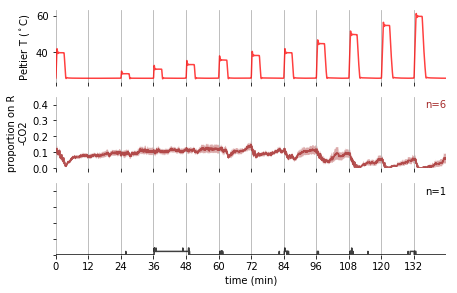

In [24]:
t = np.array(range(8640)) / 60.

f,ax = plt.subplots(3,sharex=True)
f.set_size_inches(7,4.5)

ax[0] = plot_trace(t,Rtemp[:,540:],c='r',ax=ax[0],indiv=False,sem=True)
ax[0].set_xlim(min(t),max(t))
ax[0].set_xticks(range(0,144,12))
ax[0].set_ylabel('Peltier T ($^\circ$C)')

ax[1] = plot_trace(t,aRtot[:,540:],c='brown',ax=ax[1],indiv=False,sem=True)
ax[1].set_ylim(0,0.45)
ax[1].set_yticks(np.arange(0,0.41,0.1))
ax[1].set_ylabel('proportion on R\n-CO2')
ax[1].text(136,0.38,'n=6',color='brown')

ax[2] = plot_trace(t,bRtot[:,540:],c='k',ax=ax[2],indiv=False,sem=True)
ax[2].set_ylim(0,0.45)
ax[2].set_yticks(np.arange(0,0.41,0.1))
ax[2].set_yticklabels(['']*4)
ax[2].set_xlabel('time (min)')
ax[2].text(136,0.38,'n=1',color='k')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(True)

plt.savefig('heat_groups_air.pdf')

In [ ]:
t = np.array(range(-540,8640)) / 60.

f,ax = plt.subplots(3,sharex=True)
f.set_size_inches(7,4.5)

ax[0] = plot_trace(t,Rtemp,c='r',ax=ax[0])
ax[0].set_xlim(min(t),max(t))
ax[0].set_xticks(range(0,144,12))
ax[0].set_ylabel('Peltier T ($^\circ$C)')

ax[1] = plot_trace(t,cRdot/cRtot,c='0.5',ax=ax[1])
ax[1] = plot_trace(t,dRdot/dRtot,c='orange',ax=ax[1])
#ax[1].set_ylim(0,0.12)
#ax[1].set_yticks(np.arange(0,0.121,0.02))
ax[1].set_ylabel('proportion on R\n+CO2')
ax[1].text(136,0.95,'n=8',color='0.5')
ax[1].text(136,0.80,'n=8',color='orange')
ax[1].set_yticklabels(['']*4)

ax[2] = plot_trace(t,bRdot/bRtot,c='0.5',ax=ax[2])
ax[2] = plot_trace(t,aRdot/aRtot,c='orange',ax=ax[2])
ax[2].text(136,0.95,'n=1',color='0.5')
ax[2].text(136,0.80,'n=6',color='orange')
#ax[2].set_ylim(0,0.12)
#ax[2].set_yticks(np.arange(0,0.121,0.02))
ax[2].set_ylabel('-CO2')

ax[2].set_xlabel('time (min)')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(True)

plt.savefig('dot_percent.png')

In [ ]:
t = np.array(range(-540,8640)) / 60.

f,ax = plt.subplots(3,sharex=True)
f.set_size_inches(7,4.5)

ax[0] = plot_trace(t,Rtemp,c='r',ax=ax[0])
ax[0].set_xlim(min(t),max(t))
ax[0].set_xticks(range(0,144,12))
ax[0].set_ylabel('Peltier T ($^\circ$C)')

ax[1] = plot_trace(t,cRdot,c='0.5',ax=ax[1])
ax[1] = plot_trace(t,dRdot,c='orange',ax=ax[1])
ax[1].set_ylim(0,0.12)
ax[1].set_yticks(np.arange(0,0.121,0.02))
ax[1].set_ylabel('proportion on R\n+CO2')
ax[1].text(136,0.11,'n=8',color='0.5')
ax[1].text(136,0.09,'n=8',color='orange')
ax[1].set_yticklabels(['']*4)

ax[2] = plot_trace(t,bRdot,c='0.5',ax=ax[2])
ax[2] = plot_trace(t,aRdot,c='orange',ax=ax[2])
ax[2].text(136,0.11,'n=1',color='0.5')
ax[2].text(136,0.09,'n=6',color='orange')
ax[2].set_ylim(0,0.12)
ax[2].set_yticks(np.arange(0,0.121,0.02))
ax[2].set_ylabel('-CO2')

ax[2].set_xlabel('time (min)')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(True)

plt.savefig('dot_absolute.png')

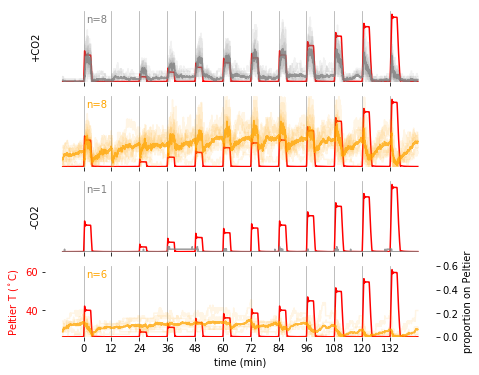

In [12]:
t = np.array(range(-540,8640)) / 60.

f, ax = plt.subplots(4,sharex=True)
f.set_size_inches(7,6)

tot = [cRtot,dRtot,bRtot,aRtot]
c = ['0.5','orange','0.5','orange']
n = [8,8,1,6]

ax[0].set_xlim(min(t),max(t))
ax[0].set_xticks(range(0,144,12))

for i in range(len(ax)):
    ax[i].plot(t,Rtavg,c='r')
    ax[i].set_ylim(26,63)
    for t1 in ax[i].get_yticklabels():
        t1.set_color('r')
    
    ax[i].xaxis.grid(True)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    if i < 3:
        ax[i].set_yticks([])
    
    ax2 = ax[i].twinx()
    ax2 = plot_trace(t,tot[i],c=c[i],ax=ax2)
    ax2.set_ylim(0,0.6)
    ax2.text(1,0.5,'n='+str(n[i]),color=c[i])
    
    if i < 3:
        ax2.axis('off')
    elif i == 3:
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)

        
ax[0].set_ylabel('+CO2')
ax[2].set_ylabel('-CO2')
ax[3].set_ylabel('Peltier T ($^\circ$C)',color='r')
ax2.set_ylabel('proportion on Peltier')
ax[3].set_xlabel('time (min)')

plt.savefig('heat_groups_temp.pdf')

In [ ]:
i = 4

f, ax = plt.subplots(1,sharex=True)
f.set_size_inches(10,3)

sampling = range(630,9180,720)
interval = 90
t = np.array(range(-540,8640)) / 60.

ax.set_xlim(min(t),max(t))
ax.set_xticks(range(0,144,12))

for s in sampling:
    ax.axvspan((s-540)/60.,(s+90-540)/60.,facecolor='r',alpha=0.2)
ax.plot(t,Rtavg,c='r')
ax.set_ylim(26,63)
for t1 in ax.get_yticklabels():
    t1.set_color('r')

ax.xaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax2 = ax.twinx()
ax2.plot(t,dRtot[i],c='orange',alpha=0.75)
ax2.set_ylim(0,0.6)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax.set_ylabel('Peltier T ($^\circ$C)',color='r')
ax2.set_ylabel('proportion on Peltier')
ax.set_xlabel('time (min)')

[ np.mean(dRtot[i,j:j+interval]) for j in sampling ]

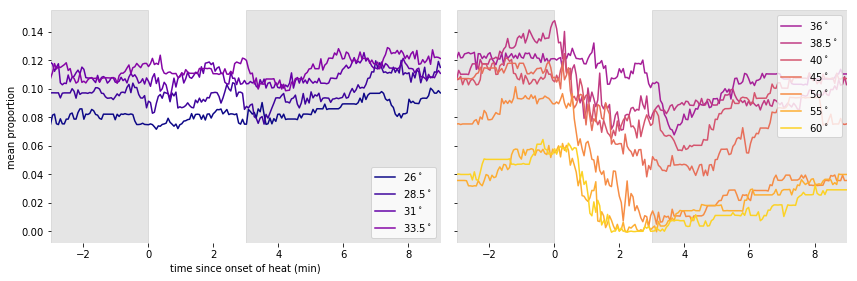

In [10]:
labels = ['26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
          '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$']

heat = range(720+540,9180,720)
before = 180
after = 360

cmap = plt.get_cmap('plasma')
c = [ cmap(i/float(len(heat))) for i in range(len(heat)) ]

f,ax = plt.subplots(1,2,sharex=True,sharey=True)
f.set_size_inches(12,4)
for a in ax:
    a.axvspan(-3,0,color='0.5',alpha=0.2,edgecolor='none')
    a.axvspan(3,9,color='0.5',alpha=0.2,edgecolor='none')
    a.set_xlim(-before/60.,3+after/60.)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
for i in range(len(heat)):
    dat = np.mean(aRtot[:,heat[i]-before:heat[i]+180+after],axis=0)
    t = np.arange(-before,180+after)/60.
    tnew = np.linspace(min(t),max(t),200)
    smoothed = spline(t,dat,tnew)
    if i < 4:
        n = 0
    else:
        #plt.legend()
        n = 1
    ax[n].plot(tnew,smoothed,c=c[i],label=labels[i])
ax[0].set_xlabel('time since onset of heat (min)')
ax[0].set_ylabel('mean proportion')
ax[0].legend(loc='lower right')
ax[1].legend(loc='upper right')
plt.tight_layout()
plt.savefig('time_air.pdf')

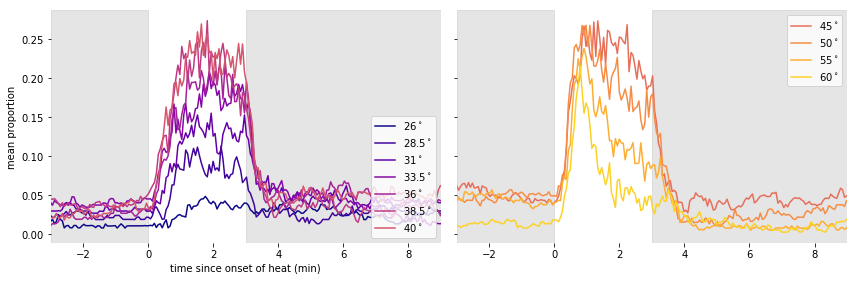

In [11]:
labels = ['26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
          '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$']

heat = range(720+540,9180,720)
before = 180
after = 360

cmap = plt.get_cmap('plasma')
c = [ cmap(i/float(len(heat))) for i in range(len(heat)) ]

f,ax = plt.subplots(1,2,sharex=True,sharey=True)
f.set_size_inches(12,4)
for a in ax:
    a.axvspan(-3,0,color='0.5',alpha=0.2,edgecolor='none')
    a.axvspan(3,9,color='0.5',alpha=0.2,edgecolor='none')
    a.set_xlim(-before/60.,3+after/60.)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
for i in range(len(heat)):
    dat = np.mean(cRtot[:,heat[i]-before:heat[i]+180+after],axis=0)
    t = np.arange(-before,180+after)/60.
    tnew = np.linspace(min(t),max(t),200)
    smoothed = spline(t,dat,tnew)
    if i < 7:
        n = 0
    else:
        #plt.legend()
        n = 1
    ax[n].plot(tnew,smoothed,c=c[i],label=labels[i])
ax[0].set_xlabel('time since onset of heat (min)')
ax[0].set_ylabel('mean proportion')
ax[0].legend(loc='lower right')
ax[1].legend(loc='upper right')
plt.tight_layout()
plt.savefig('time_control.pdf')

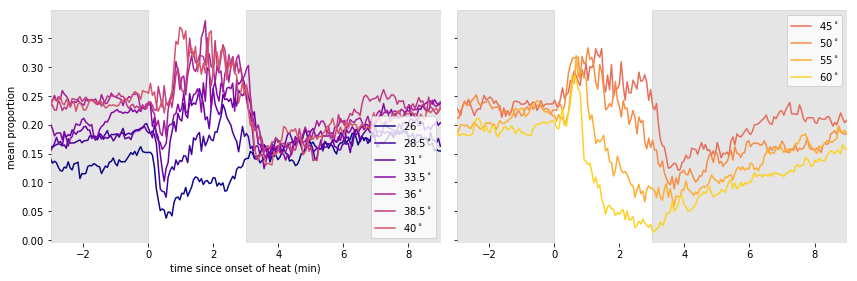

In [12]:
labels = ['26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
          '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$']

heat = range(720+540,9180,720)
before = 180
after = 360

cmap = plt.get_cmap('plasma')
c = [ cmap(i/float(len(heat))) for i in range(len(heat)) ]

f,ax = plt.subplots(1,2,sharex=True,sharey=True)
f.set_size_inches(12,4)
for a in ax:
    a.axvspan(-3,0,color='0.5',alpha=0.2,edgecolor='none')
    a.axvspan(3,9,color='0.5',alpha=0.2,edgecolor='none')
    a.set_xlim(-before/60.,3+after/60.)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
for i in range(len(heat)):
    dat = np.mean(dRtot[:,heat[i]-before:heat[i]+180+after],axis=0)
    t = np.arange(-before,180+after)/60.
    tnew = np.linspace(min(t),max(t),200)
    smoothed = spline(t,dat,tnew)
    if i < 7:
        n = 0
    else:
        #plt.legend()
        n = 1
    ax[n].plot(tnew,smoothed,c=c[i],label=labels[i])
ax[0].set_xlabel('time since onset of heat (min)')
ax[0].set_ylabel('mean proportion')
ax[0].legend(loc='lower right')
ax[1].legend(loc='upper right')
plt.tight_layout()
plt.savefig('time_visual.pdf')

In [ ]:
labels = ['26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
          '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$']

heat = range(720+540,9180,720)
before = 180
after = 360

select_i = [0,2,6,10]

cmap = plt.get_cmap('plasma')
c = [ cmap(i/float(len(heat))) for i in range(len(heat)) ].reverse()

f,ax = plt.subplots(1,sharex=True,sharey=True)
f.set_size_inches(10,5)
ax.axvspan(-3,0,color='0.5',alpha=0.2,edgecolor='none')
ax.axvspan(3,9,color='0.5',alpha=0.2,edgecolor='none')
ax.set_xlim(-before/60.,3+after/60.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for i in select_i:
    dat = np.mean(cRtot[:,heat[i]-before:heat[i]+180+after],axis=0)
    t = np.arange(-before,180+after)/60.
    tnew = np.linspace(min(t),max(t),200)
    smoothed = spline(t,dat,tnew)
    ax.plot(tnew,smoothed,c=c[i],label=labels[i],ls='--')
    dat = np.mean(dRtot[:,heat[i]-before:heat[i]+180+after],axis=0)
    t = np.arange(-before,180+after)/60.
    tnew = np.linspace(min(t),max(t),200)
    smoothed = spline(t,dat,tnew)
    ax.plot(tnew,smoothed,c=c[i],label=labels[i])
ax.set_xlabel('time since onset of heat (min)')
ax.set_ylabel('mean proportion')
ax.legend(loc='lower right')
#plt.savefig('time_control.pdf')

C:\Users\liber\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


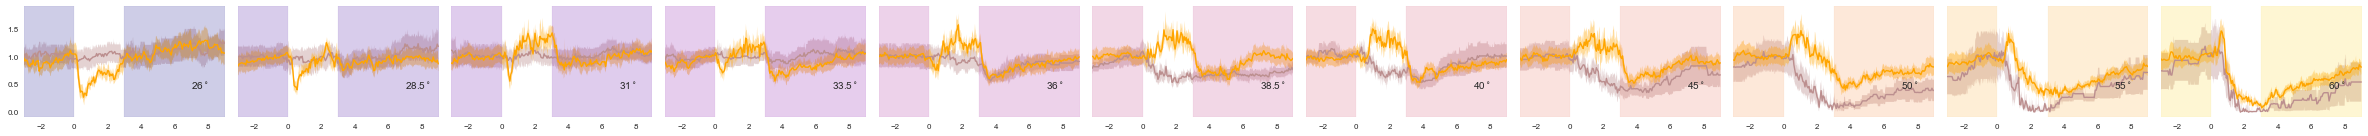

In [38]:
labels = ['26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
          '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$']

heat = range(720+540,9180,720)
before = 180
after = 360

data = [aRtot,dRtot]
ls = ['rosybrown','orange']

cmap = plt.get_cmap('plasma')
c = [ cmap(i/float(len(heat))) for i in range(len(heat)) ]

f,ax = plt.subplots(1,len(heat),sharex=True,sharey=True)
f.set_size_inches(3*len(heat),2)

for i in range(len(ax)):
    # cosmetic
    ax[i].axvspan(-before/60,0,color=c[i],alpha=0.2,edgecolor='none')
    ax[i].axvspan(3,3+after/60,color=c[i],alpha=0.2,edgecolor='none')
    ax[i].set_xlim(-before/60.,3+after/60.)
    ax[i].text(after/60+3-2,0.4,labels[i])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].grid(False)
    #if i < len(ax)-1:
    #    ax[i].set_xticks([])
    
    for k in range(len(data)):
        t = np.arange(-before,180+after)/60.
        #for trace in data[k]:
        #    ax[i].plot(t,trace[heat[i]-before:heat[i]+180+after],c=c[i],alpha=0.1,ls=ls[k])
        dat = np.mean(data[k][:,heat[i]-before:heat[i]+180+after],axis=0)
        baseline = 1/(np.mean(dat[120:180]))
        dat *= baseline
        sem = np.std(data[k][:,heat[i]-before:heat[i]+180+after],axis=0)/np.sqrt(len(data[k]))
        sem *= baseline
        ax[i].fill_between(t,dat+sem,dat-sem,facecolor=ls[k],edgecolor='none',alpha=0.4)
        tnew = np.linspace(min(t),max(t),200)
        smoothed = spline(t,dat,tnew)
        ax[i].plot(tnew,smoothed,c=ls[k])
        
plt.tight_layout()
plt.savefig('timecomp_co2.pdf')

C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


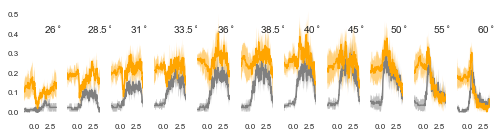

In [8]:
labels = ['26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
          '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$']

heat = range(720+540,9180,720)
before = 90
after = 30

data = [cRtot,dRtot]
ls = ['0.5','orange']

f,ax = plt.subplots(1,len(heat),sharex=True,sharey=True)
f.set_size_inches(7,2)

for i in range(len(ax)):
    # cosmetic
    #ax[i].axvline(-before/60,0,color=c[i],alpha=0.2,edgecolor='none')
    #ax[i].axvspan(3,3+after/60,color=c[i],alpha=0.2,edgecolor='none')
    ax[i].set_xlim(-before/60.,3+after/60.)
    ax[i].text(after/60+3-2,0.4,labels[i])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].grid(False)
    #if i < len(ax)-1:
    #    ax[i].set_xticks([])
    
    for k in range(len(data)):
        t = np.arange(-before,180+after)/60.
        #for trace in data[k]:
        #    ax[i].plot(t,trace[heat[i]-before:heat[i]+180+after],c=c[i],alpha=0.1,ls=ls[k])
        dat = np.nanmedian(data[k][:,heat[i]-before:heat[i]+180+after],axis=0)
        sem = mad(data[k][:,heat[i]-before:heat[i]+180+after],axis=0,c=1)
        ax[i].fill_between(t,dat+sem,dat-sem,facecolor=ls[k],edgecolor='none',alpha=0.5)
        tnew = np.linspace(min(t),max(t),200)
        smoothed = spline(t,dat,tnew)
        ax[i].plot(tnew,smoothed,c=ls[k])
        
plt.tight_layout()
plt.savefig('timecomp_new.pdf')

C:\Users\liber\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


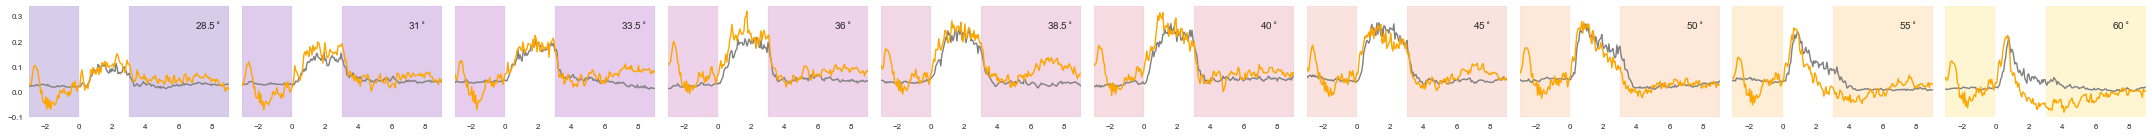

In [37]:
labels = ['28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
          '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$']

heat = range(720*2+540,9180,720)
before = 180
after = 360

data = [cRtot,dRtot]
ls = ['0.5','orange']

cmap = plt.get_cmap('plasma')
c = [ cmap((i+1)/float(11)) for i in range(11) ]

f,ax = plt.subplots(1,len(heat),sharex=True,sharey=True)
f.set_size_inches(3*len(heat),2)

for i in range(len(ax)):
    # cosmetic
    ax[i].axvspan(-before/60,0,color=c[i],alpha=0.2,edgecolor='none')
    ax[i].axvspan(3,3+after/60,color=c[i],alpha=0.2,edgecolor='none')
    ax[i].set_xlim(-before/60.,3+after/60.)
    ax[i].text(after/60+3-2,0.25,labels[i])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].grid(False)
    #if i < len(ax)-1:
    #    ax[i].set_xticks([])
    
    for k in range(len(data)):
        t = np.arange(-before,180+after)/60.
        dat = np.mean(data[k][:,heat[i]-before:heat[i]+180+after],axis=0)
        if k == 1:
            adj = np.mean(data[k][:,720-before:720+180+after],axis=0)
            dat -= adj
        tnew = np.linspace(min(t),max(t),200)
        smoothed = spline(t,dat,tnew)
        ax[i].plot(tnew,smoothed,c=ls[k])
        
plt.tight_layout()
plt.savefig('timecompadj.pdf')

In [11]:
sampling = range(1170,8640,720)
interval = 90

n = len(sampling)
cBase = np.empty([len(cRtot),n])
cBase[:] = np.nan
for i in range(len(cRtot)):
    cBase[i] = [ np.mean(cRtot[i,j:j+interval]) for j in sampling ]
cBase = np.transpose(cBase)

n = len(sampling)
dBase = np.empty([len(dRtot),n])
dBase[:] = np.nan
for i in range(len(dRtot)):
    dBase[i] = [ np.mean(dRtot[i,j:j+interval]) for j in sampling ]
dBase = np.transpose(dBase)

In [12]:
sampling = range(1350,9180,720)
interval = 90

n = len(sampling)
cHeat = np.empty([len(cRtot),n])
cHeat[:] = np.nan
for i in range(len(cRtot)):
    cHeat[i] = [ np.mean(cRtot[i,j:j+interval]) for j in sampling ]
cHeat = np.transpose(cHeat)

n = len(sampling)
dHeat = np.empty([len(dRtot),n])
dHeat[:] = np.nan
for i in range(len(dRtot)):
    dHeat[i] = [ np.mean(dRtot[i,j:j+interval]) for j in sampling ]
dHeat = np.transpose(dHeat)

In [10]:
dat = sio.loadmat(path+'original_dot.mat')
cdot = dat['cdot'][1:]
ddot = dat['ddot'][1:]

NameError: name 'cHeat' is not defined

IndexError: index 3 is out of bounds for axis 0 with size 3

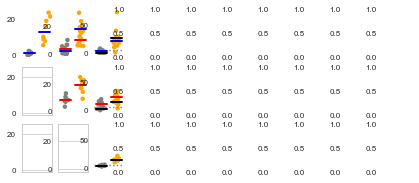

In [13]:
reload(hsutil)
f,ax = plt.subplots(11,3,sharex=True,sharey='col')
pc = ['0.5','orange']
f.set_size_inches(3,16.5)
for i in range(11):
    ax[i][0] = hsutil.dotplot(np.vstack([cBase[i],dBase[i]])*100,pc=pc,mc='b',ax=ax[i][0],fixline=False)
    ax[i][1] = hsutil.dotplot(np.vstack([cHeat[i],dHeat[i]])*100,pc=pc,mc='r',ax=ax[i][1],fixline=False)
    ax[i][2] = hsutil.dotplot(np.vstack([cdot[i],ddot[i]])*100,pc=pc,mc='k',ax=ax[i][2],fixline=True)
    for a in ax[i]:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['left'].set_visible(False)
        a.spines['bottom'].set_visible(False)
        a.xaxis.grid(False)
        a.yaxis.grid(False)
ax[-1][-1].set_xlim(-0.5,1.5)
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.savefig('dotplots_base-heat-dot.pdf')

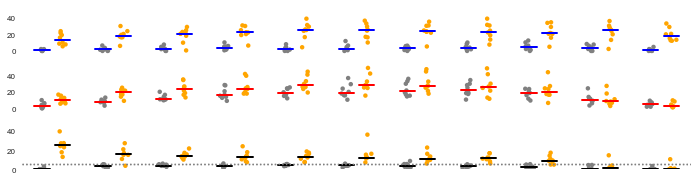

In [28]:
reload(hsutil)
f,ax = plt.subplots(3,1,sharex=True)
pc = ['0.5','orange']
cpos = range(0,33,3)
dpos = range(1,33,3)
f.set_size_inches(12,3)

ax[0] = hsutil.dotplot(cBase*100,pc=pc[0],pos=cpos,mc='b',ax=ax[0],fixline=False)
ax[0] = hsutil.dotplot(dBase*100,pc=pc[1],pos=dpos,mc='b',ax=ax[0],fixline=False)
ax[1] = hsutil.dotplot(cHeat*100,pc=pc[0],pos=cpos,mc='r',ax=ax[1],fixline=False)
ax[1] = hsutil.dotplot(dHeat*100,pc=pc[1],pos=dpos,mc='r',ax=ax[1],fixline=False)
ax[2] = hsutil.dotplot(cdot*100,pc=pc[0],pos=cpos,mc='k',ax=ax[2],fixline=True)
ax[2] = hsutil.dotplot(ddot*100,pc=pc[1],pos=dpos,mc='k',ax=ax[2],fixline=True)
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(False)
    a.yaxis.grid(False)
ax[0].set_ylim(ax[1].get_ylim())
ax[0].set_yticks(range(0,60,20))
ax[1].set_yticks(range(0,60,20))
ax[2].set_yticks(range(0,60,20))
ax[2].set_ylim([0,50])
ax[0].set_xlim([-1,32])
plt.savefig('dotplots_base-heat-dot_horz.pdf')

In [26]:
ddot

array([[ 0.12931034,  0.27099237,  0.2304038 ,  0.17786561,  0.27272727,
         0.24207493,  0.72997033,  0.39517625],
       [ 0.10786914,  0.20874317,  0.15893108,  0.15167931,  0.15059445,
         0.16965227,  0.27184466,  0.03686636],
       [ 0.13417722,  0.15511325,  0.13282248,  0.10138249,  0.14831261,
         0.17185822,  0.21702838,  0.11835106],
       [ 0.10408922,  0.14209275,  0.08300395,  0.13282732,  0.17843511,
         0.12115194,  0.24      ,  0.0738255 ],
       [ 0.12317666,  0.16122234,  0.07699443,  0.11028316,  0.17331023,
         0.13949716,  0.18612717,  0.0724234 ],
       [ 0.16194969,  0.12674028,  0.0719697 ,  0.11636045,  0.15241379,
         0.11800172,  0.36130868,  0.1158267 ],
       [ 0.1224591 ,  0.16188119,  0.05963699,  0.08647654,  0.0960334 ,
         0.13359148,  0.22657177,  0.0984456 ],
       [ 0.10481283,  0.11716091,  0.08265213,  0.11136364,  0.16729182,
         0.12284069,  0.16792453,  0.06070826],
       [ 0.04971857,  0.10822511

In [6]:
sampling = range(450,9180,720)
interval = 90

n = len(sampling)
dRpts = np.empty([len(dRtot),n])
dRpts[:] = np.nan
for i in range(len(dRtot)):
    dRpts[i] = [ np.mean(dRtot[i,j:j+interval]) for j in sampling ]
dRpts = np.transpose(dRpts)
#np.mean(dRpts,axis=1)

n = len(sampling)
aRpts = np.empty([len(aRtot),n])
aRpts[:] = np.nan
for i in range(len(aRtot)):
    aRpts[i] = [ np.mean(aRtot[i,j:j+interval])/np.mean(aRtot[i,j-150:j-90]) for j in sampling ]
aRpts = np.transpose(aRpts)
np.nanmean(aRpts,axis=1)

C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


array([ 1.16757375,  1.08523728,  1.02677776,  0.94007198,  1.0006312 ,
        0.99894124,  1.30331637,  1.12565817,  1.05809849,  1.21101684,
               inf,         inf,         inf])

In [48]:
n = len(sampling)
bfRpts = np.empty([len(bfRtot),n])
bfRpts[:] = np.nan
for i in range(len(bfRtot)):
    bfRpts[i] = [ np.mean(bfRtot[i,j:j+interval]) for j in sampling ]
bfRpts = np.transpose(bfRpts)
np.mean(bfRpts,axis=1)

array([ 0.05839736,  0.08337182,  0.0867414 ,  0.09510179,  0.0944629 ,
        0.09296953,  0.09307138,  0.10295357,  0.05659542,  0.00748457,
        0.00077325,  0.        ])

In [42]:
(np.mean(dRpts,axis=1) - np.mean(cRpts,axis=1))/np.std(cRpts,axis=1)

array([ 0.1398018 ,  2.1303847 ,  3.89799028,  3.25688404,  1.25652922,
        2.47005946,  1.19181852,  0.90609107,  0.58681721,  0.86044124,
       -0.01243235, -0.50860766])

In [44]:
np.std(dRpts,axis=1)

array([ 0.05694676,  0.03840945,  0.04904267,  0.07373255,  0.08627061,
        0.08012737,  0.09758614,  0.09842564,  0.11817398,  0.1004764 ,
        0.07311787,  0.03036832])

In [31]:
sampling = range(540+240,9180,720)
interval = 480

n = len(sampling)
ncRpts = np.empty([len(cRtot),n])
ncRpts[:] = np.nan
for i in range(len(cRtot)):
    ncRpts[i] = [ np.mean(cRtot[i,j:j+interval]) for j in sampling ]
ncRpts = np.transpose(ncRpts)

In [45]:
import power

In [57]:
cM = np.mean(cRpts,axis=1)
cS = np.std(cRpts,axis=1)
dM = np.mean(dRpts,axis=1)
dS = np.std(dRpts,axis=1)

labels = ['40$^\circ$','26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
          '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$']

for i in range(len(cM)):
    print labels[i]
    _ = power.calc_power(8,[cM[i],dM[i]],[cS[i],dS[i]],100000)

40$^\circ$
Power:  0.05757
26$^\circ$
Power:  0.94304
28.5$^\circ$
Power:  0.99738
31$^\circ$
Power:  0.9365
33.5$^\circ$
Power:  0.50888
36$^\circ$
Power:  0.8844
38.5$^\circ$
Power:  0.4992
40$^\circ$
Power:  0.31999
45$^\circ$
Power:  0.13242
50$^\circ$
Power:  0.17113
55$^\circ$
Power:  0.05033
60$^\circ$
Power:  0.13021


In [53]:
n = len(sampling)
ndRpts = np.empty([len(dRtot),n])
ndRpts[:] = np.nan
for i in range(len(dRtot)):
    ndRpts[i] = [ np.mean(dRtot[i,j:j+interval]) for j in sampling ]
ndRpts = np.transpose(ndRpts)
ndRpts

array([[ 0.26022222,  0.25845411,  0.13743961,  0.11950617,  0.225     ,
         0.16222222,  0.23673469,  0.12355556],
       [ 0.12688889,  0.05748792,  0.09227053,  0.06148148,  0.15324074,
         0.16641975,  0.07573696,  0.11266667],
       [ 0.24911111,  0.21376812,  0.16884058,  0.22444444,  0.1712963 ,
         0.22641975,  0.09160998,  0.14177778],
       [ 0.34777778,  0.3410628 ,  0.18550725,  0.26444444,  0.25578704,
         0.21580247,  0.1324263 ,  0.16444444],
       [ 0.41377778,  0.39227053,  0.17826087,  0.25703704,  0.23472222,
         0.2417284 ,  0.17823129,  0.19622222],
       [ 0.40577778,  0.44130435,  0.25772947,  0.32740741,  0.26018519,
         0.2945679 ,  0.19160998,  0.23422222],
       [ 0.41844444,  0.48574879,  0.25144928,  0.27901235,  0.32337963,
         0.28      ,  0.15464853,  0.24555556],
       [ 0.44311111,  0.47077295,  0.27681159,  0.2654321 ,  0.32291667,
         0.24938272,  0.17732426,  0.21044444],
       [ 0.41066667,  0.48067633

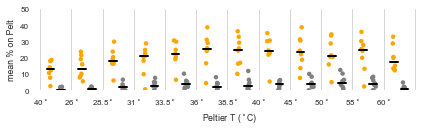

In [9]:
reload(hsutil)
f,ax = plt.subplots(1)
f.set_size_inches(7,1.5)
ax = hsutil.dotplot(cRpts[:-1]*100,mc='k',pc='0.5',pos=range(1,36,3),fixline=False,ax=ax)
ax = hsutil.dotplot(dRpts[:-1]*100,mc='k',pc='orange',pos=range(0,36,3),fixline=False,ax=ax)
ax.set_xlim(-1.5,36)
ax.set_ylim(0,0.5)
ax.set_yticks(np.arange(0,55,10))
ax.set_xticks(np.arange(-1,36,3))
ax.set_xticklabels(['40$^\circ$','26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
                    '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$'])
ax.set_ylabel('mean % on Pelt')
ax.set_xlabel('Peltier T ($^\circ$C)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.grid(True)
ax.yaxis.grid(False)
#ax.scatter([0.4,1.4,2.4,3.4,4.4,5.4],cRpts,c='0.75',edgecolor='none')
plt.savefig('heat_ptsbase.pdf')

In [8]:
cRpts

array([[ 0.        ,  0.        ,  0.        ,  0.02      ,  0.02173913,
         0.        ,  0.        ,  0.        ],
       [ 0.00688889,  0.00025253,  0.02173913,  0.01466667,  0.01545894,
         0.00074074,  0.        ,  0.02246377],
       [ 0.        ,  0.00479798,  0.03647343,  0.01466667,  0.06521739,
         0.        ,  0.02083333,  0.02173913],
       [ 0.02577778,  0.00050505,  0.05024155,  0.02533333,  0.0763285 ,
         0.04864198,  0.        ,  0.02173913],
       [ 0.01688889,  0.00757576,  0.10193237,  0.052     ,  0.05917874,
         0.05259259,  0.02083333,  0.02173913],
       [ 0.        ,  0.01060606,  0.08043478,  0.04533333,  0.        ,
         0.0254321 ,  0.01597222,  0.0410628 ],
       [ 0.        ,  0.00959596,  0.01763285,  0.03333333,  0.0647343 ,
         0.11851852,  0.02083333,  0.04637681],
       [ 0.04155556,  0.01085859,  0.06304348,  0.05822222,  0.04347826,
         0.03530864,  0.        ,  0.02198068],
       [ 0.00022222,  0.02020202

In [26]:
i = 8
y = aRpts[i]
y = y[~np.isnan(y) & ~np.isinf(y)]
print(y)

[ 0.47407407  0.30350877  0.4565425   0.66234701  0.60493827]


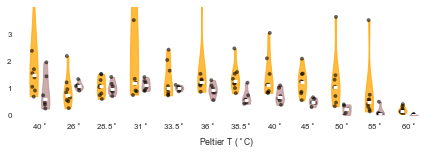

In [30]:
reload(hsutil)
f,ax = plt.subplots(1)
f.set_size_inches(7.5,2)
ax = hsutil.violinplot(dRpts,fc=['orange']*12,ec=['orange']*12,mc='w',jitter=0.1,pos=range(0,36,3),pc='k',fixline=False,ax=ax)
ax = hsutil.violinplot(aRpts,fc=['rosybrown']*12,ec=['rosybrown']*12,mc='w',jitter=0.1,pos=range(1,36,3),pc='k',fixline=False,ax=ax)
ax.set_xlim(-1.5,36)
ax.set_ylim(0,4)
ax.set_yticks(np.arange(0,4,1))
ax.set_xticks(np.arange(0.5,36,3))
ax.set_xticklabels(['40$^\circ$','26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
                    '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$'])
#ax.set_ylabel('mean proportion during heat')
ax.set_xlabel('Peltier T ($^\circ$C)')
ax.grid(False)
#ax.scatter([0.4,1.4,2.4,3.4,4.4,5.4],cRpts,c='0.75',edgecolor='none')
plt.savefig('heat_noco2.pdf')

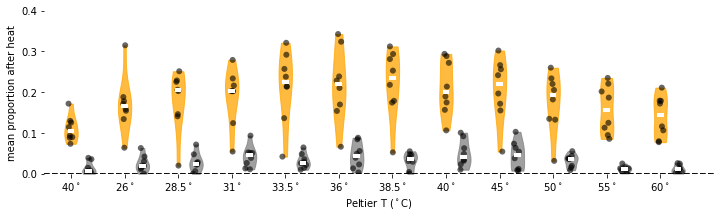

In [33]:
#reload(magno)
f,ax = plt.subplots(1)
f.set_size_inches(12,3)
ax = magno.violinplot(ncRpts,fc=['0.5']*12,ec=['0.5']*12,mc='w',jitter=0.1,pos=range(1,36,3),pc='k',fixline=False,ax=ax)
ax = magno.violinplot(ndRpts,fc=['orange']*12,ec=['orange']*12,mc='w',jitter=0.1,pos=range(0,36,3),pc='k',fixline=False,ax=ax)
ax.set_xlim(-1.5,36)
ax.set_ylim(0,0.4)
ax.set_yticks(np.arange(0,0.45,0.1))
ax.set_xticks(range(0,36,3))
ax.set_xticklabels(['26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
                    '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$'])
ax.set_ylabel('mean proportion after heat')
ax.set_xlabel('Peltier T ($^\circ$C)')
#ax.scatter([0.4,1.4,2.4,3.4,4.4,5.4],cRpts,c='0.75',edgecolor='none')
plt.savefig('heat_ptsbase.pdf')

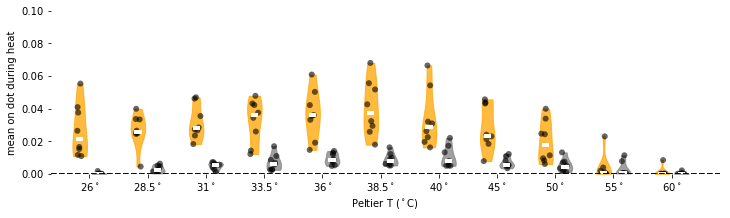

In [28]:
sampling = range(540+720+90,9180,720)
interval = 90


n = len(sampling)
cdRpts = np.empty([len(cRdot),n])
cdRpts[:] = np.nan
for i in range(len(cRdot)):
    cdRpts[i] = [ np.mean(cRdot[i,j:j+interval]) for j in sampling ]
cdRpts = np.transpose(cdRpts)

ddRpts = np.empty([len(dRdot),n])
ddRpts[:] = np.nan
for i in range(len(dRdot)):
    ddRpts[i] = [ np.mean(dRdot[i,j:j+interval]) for j in sampling ]
ddRpts = np.transpose(ddRpts)

f,ax = plt.subplots(1)
f.set_size_inches(12,3)
ax = magno.violinplot(cdRpts,fc=['0.5']*11,ec=['0.5']*11,mc='w',jitter=0.1,pos=range(1,35,3),pc='k',fixline=False,ax=ax)
ax = magno.violinplot(ddRpts,fc=['orange']*11,ec=['orange']*11,mc='w',jitter=0.1,pos=range(0,35,3),pc='k',fixline=False,ax=ax)
ax.set_xlim(-1.5,33)
ax.set_ylim(0,0.1)
ax.set_yticks(np.arange(0,0.11,0.02))
ax.set_xticks(np.arange(0.5,33,3))
ax.set_xticklabels(['26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
                    '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$'])
ax.set_ylabel('mean on dot during heat')
ax.set_xlabel('Peltier T ($^\circ$C)')
plt.savefig('dot_ptsheatabs.pdf')

In [ ]:
sampling = range(540+240,9180,720)
interval = 480

n = len(sampling)
rcdRpts = np.empty([len(cRdot),n])
rcdRpts[:] = np.nan
for i in range(len(cRdot)):
    rcdRpts[i] = [ np.nanmean(cRdot[i,j:j+interval]/cRtot[i,j:j+interval]) for j in sampling ]
rcdRpts = np.transpose(rcdRpts)

rddRpts = np.empty([len(dRdot),n])
rddRpts[:] = np.nan
for i in range(len(dRdot)):
    rddRpts[i] = [ np.nanmean(dRdot[i,j:j+interval]/dRtot[i,j:j+interval]) for j in sampling ]
rddRpts = np.transpose(rddRpts)

f,ax = plt.subplots(1)
f.set_size_inches(12,3)
ax = magno.violinplot(rcdRpts,fc=['0.5']*12,ec=['0.5']*12,mc='w',jitter=0.1,pos=range(1,36,3),pc='k',fixline=False,ax=ax)
ax = magno.violinplot(rddRpts,fc=['orange']*12,ec=['orange']*12,mc='w',jitter=0.1,pos=range(0,36,3),pc='k',fixline=False,ax=ax)
ax.set_xlim(-1.5,36)
#ax.set_ylim(0,1.0)
#ax.set_yticks(np.arange(0,1.0,0.2))
ax.set_xticks(np.arange(0.5,36,3))
ax.set_xticklabels(['40$^\circ$','26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
                    '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$'])
ax.set_ylabel('mean dot/pelt after heat')
ax.set_xlabel('Peltier T ($^\circ$C)')
plt.savefig('dot_ptsbasepor.png')

In [11]:
def friedman(fda):
    print(stats.friedmanchisquare(*(d for d in fda))[1])
    ntests = 0
    for i in range(fda.shape[0]):
        printstr = ''
        for j in range(i+1,fda.shape[0]):
            printstr = printstr + str(round(stats.wilcoxon(fda[i],fda[j])[1],4)) + '\t'
            ntests += 1
        print(printstr)
    print(0.05/ntests)
    
def multiMWU(fa,fb,alpha=0.05):
    n,_ = fa.shape
    ntests = 0
    for i in range(n):
        print(stats.mannwhitneyu(fa[i],fb[i]))
        ntests += 1
    print ('p_adj = '+str(alpha/ntests))

In [ ]:
friedman(ndRpts)

In [12]:
multiMWU(dRpts,cRpts)

MannwhitneyuResult(statistic=0.0, pvalue=0.00034097816212965288)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=1.0, pvalue=0.00067414364546817813)
MannwhitneyuResult(statistic=6.0, pvalue=0.0037027666702501342)
MannwhitneyuResult(statistic=1.0, pvalue=0.00067968776357961609)
MannwhitneyuResult(statistic=2.0, pvalue=0.00096629654271999346)
MannwhitneyuResult(statistic=1.0, pvalue=0.00067968776357961609)
MannwhitneyuResult(statistic=2.0, pvalue=0.00097376379297333261)
MannwhitneyuResult(statistic=2.0, pvalue=0.00097376379297333261)
MannwhitneyuResult(statistic=4.0, pvalue=0.001938020724497375)
MannwhitneyuResult(statistic=5.0, pvalue=0.0026924700000735156)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046548613578750102)
MannwhitneyuResult(statistic=0.0, pvalue=0.00045342837549617443)
p_adj = 0.0038461538461538464


In [30]:
multiMWU(ddRpts,cdRpts)

(0.0, 0.00027676738283429598)
(2.5, 0.0011524206086285934)
(0.0, 0.00046955284955859495)
(2.0, 0.00097376379297333261)
(0.0, 0.00046955284955859495)
(0.0, 0.00046955284955859495)
(3.0, 0.0013808022089137366)
(3.0, 0.0013808022089137366)
(6.0, 0.0037027666702501342)
(26.0, 0.28016720015482272)
(25.5, 0.20388738031129566)
p_adj = 0.00454545454545


In [ ]:
friedman(dRpts)

In [ ]:
friedman(cRpts)

In [34]:
multiMWU(dRpts,aRpts)

MannwhitneyuResult(statistic=11.0, pvalue=0.053291584787443801)
MannwhitneyuResult(statistic=12.0, pvalue=0.068819127554091392)
MannwhitneyuResult(statistic=22.0, pvalue=0.42322529843829532)
MannwhitneyuResult(statistic=24.0, pvalue=0.47426625842532216)
MannwhitneyuResult(statistic=23.0, pvalue=0.47426625842532216)
MannwhitneyuResult(statistic=7.0, pvalue=0.016579993729423884)
MannwhitneyuResult(statistic=4.0, pvalue=0.0059105689183111508)
MannwhitneyuResult(statistic=6.0, pvalue=0.011934221082287175)
MannwhitneyuResult(statistic=10.0, pvalue=0.040680564617037729)
MannwhitneyuResult(statistic=10.0, pvalue=0.040680564617037729)
MannwhitneyuResult(statistic=4.0, pvalue=0.0059105689183111508)
MannwhitneyuResult(statistic=0.0, pvalue=0.0012073244568794233)
p_adj = 0.004166666666666667


In [ ]:
0.05/11

In [48]:
# violinplots for on dot
dat = sio.loadmat(path+'original_dot.mat')
cdot = dat['cdot'][1:]
ddot = dat['ddot'][1:]
cdotn = dat['cdotn']
ddotn = dat['ddotn']

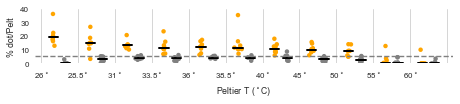

In [43]:
reload(hsutil)
f,ax = plt.subplots(1)
f.set_size_inches(7.5,1)
ax = hsutil.dotplot(ddot[1:,:]*100,mc='k',pos=range(0,36,3),pc=['orange'],fixline=False,ax=ax)
ax = hsutil.dotplot(cdot[1:,:]*100,mc='k',pos=range(1,36,3),pc=['0.5'],fixline=False,ax=ax)
ax.set_xlim(-1.5,32.5)
ax.set_ylim(0,40)
ax.axhline(5.42,c='0.5',ls='--')
ax.set_yticks(np.arange(0,50,10))
ax.set_xticks(np.arange(-1,33,3))
ax.set_xticklabels(['26$^\circ$','28.5$^\circ$','31$^\circ$','33.5$^\circ$','36$^\circ$',
                    '38.5$^\circ$','40$^\circ$','45$^\circ$','50$^\circ$','55$^\circ$','60$^\circ$'])
ax.set_ylabel('% dot/Pelt')
ax.set_xlabel('Peltier T ($^\circ$C)')
ax.yaxis.grid(False)
#ax.scatter([0.4,1.4,2.4,3.4,4.4,5.4],cRpts,c='0.75',edgecolor='none')
plt.savefig('original_dot_ratio.pdf')

In [39]:
hsutil.multiMWU(ddot,cdot)

MannwhitneyuResult(statistic=10.0, pvalue=0.011974337439879718)
MannwhitneyuResult(statistic=0.0, pvalue=0.00034097816212965288)
MannwhitneyuResult(statistic=4.0, pvalue=0.001938020724497375)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=3.0, pvalue=0.0013808022089137366)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=3.0, pvalue=0.0013808022089137366)
MannwhitneyuResult(statistic=23.0, pvalue=0.18424227414148941)
MannwhitneyuResult(statistic=25.5, pvalue=0.20388738031129566)
p_adj = 0.004166666666666667
